In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from itertools import cycle, chain
import glob#, os

import astro310
import astropy
from astropy.table import Table
from astropy.io import ascii
from astropy.nddata import NDData

rc('axes',fc='w',ec='k',lw=0.5,grid=True)
rc('lines',lw=1)
rc('grid',c='k',lw='0.1',alpha=0.5)
rc('legend',handletextpad=0.2,markerscale=1.4)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
rc('font', **font)
rc('text', usetex=True)

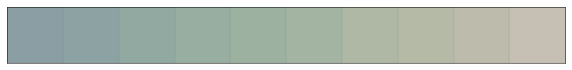

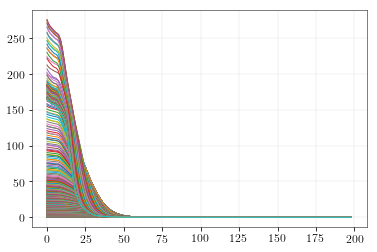

In [4]:
num_profiles = 0
num_variables = 0
num_r = 0

profile_names = []

for file in glob.glob('ezweb-1-Msun/structure*txt'):
    if num_profiles is 0:
        profile = np.genfromtxt(file)
        num_r = profile.shape[0]
        num_variables = profile.shape[1]
    num_profiles += 1
    profile_names.append(file)
    
profile_cube = np.empty((num_r,num_variables,num_profiles))

for num_profile, profile_name in zip(range(num_profiles), profile_names):
    profile_cube[:,:,num_profile] = np.genfromtxt(profile_name)

profile_dict = {'m':0, 'r':1, 'F':2, 'P':3, 'rho':4, 'T':5, 'u':6, 's':7, 
             'c_P':8, 'gamma_ad':9, 'nabla_ad':10, 'mu':11, 'n_e':12, 
             'P_e':13, 'P_rad':14, 'nabla_rad':15, 'nabla':16, 'v_c':17,
             'kappa':18, 'q_nuc':19, 'q_PP':20, 
             'q_CNO':21, 'q_3a':22, 'q_nunuc':23,
             'q_nu':24, 'q_grav':25, 'X':26, 'X_mol':27,
             'X_+':28, 'Y':29, 'Y_+':30, 'Y_++':31, 'X_C':32, 'X_N':33, 
             'X_O':34, 'Psi':35}

profile_nddata = NDData(data=profile_cube, meta=profile_dict)

def return_table(string):
    return profile_nddata.data[:,profile_nddata.meta[string],:]
    
radius = return_table('r')

for t in range(radius.shape[1]):
    plt.plot(radius[:,t])
plt.show()

In [7]:
profile_nddata.meta

{'F': 2,
 'P': 3,
 'P_e': 13,
 'P_rad': 14,
 'Psi': 35,
 'T': 5,
 'X': 26,
 'X_+': 28,
 'X_C': 32,
 'X_N': 33,
 'X_O': 34,
 'X_mol': 27,
 'Y': 29,
 'Y_+': 30,
 'Y_++': 31,
 'c_P': 8,
 'gamma_ad': 9,
 'kappa': 18,
 'm': 0,
 'mu': 11,
 'n_e': 12,
 'nabla': 16,
 'nabla_ad': 10,
 'nabla_rad': 15,
 'q_3a': 22,
 'q_CNO': 21,
 'q_PP': 20,
 'q_grav': 25,
 'q_nu': 24,
 'q_nuc': 19,
 'q_nunuc': 23,
 'r': 1,
 'rho': 4,
 's': 7,
 'u': 6,
 'v_c': 17}

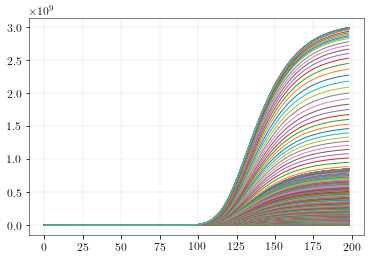

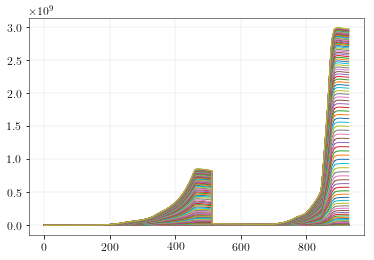

In [10]:
dens = return_table('rho')
for t in range(dens.shape[1]):
    plt.plot(dens[:,t])
plt.show()

for r in range(dens.shape[0]):
    plt.plot(dens[r,:])
plt.show()

## Learning Goals

- Import data from a text file
- Create 3d datasets using NDdata
- Assign metadata to NDdata cube
- Access/manipulate dataset using dict keys

- more specifically, learn how to make a dataset with $x=r$, $y=t$, and $z=$ parameters or values with relations $a_0(r,t),a_1(r,t),...,a_n(r,t)$

## Steps

## Challenge Problems

- Use EZweb to generate profiles